<a href="https://colab.research.google.com/github/nidhirathod15/projects/blob/main/stresslevel_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : Stress level

Roll number : 47, 55

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset

In [ ]:
import pandas as pd
sl = pd.read_csv("/content/drive/MyDrive/stresslevel.csv")

In [ ]:
sl.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [ ]:
sl.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14.0,20.0,0.0,11.0,2.0,1.0,2.0,4.0,2.0,3.0,...,2.0,3.0,2.0,3.0,3.0,2.0,3.0,3,2.0,1.0
1,15.0,8.0,1.0,15.0,5.0,3.0,1.0,4.0,3.0,1.0,...,2.0,1.0,4.0,1.0,5.0,1.0,4.0,5,5.0,2.0
2,12.0,18.0,1.0,14.0,2.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2,2.0,1.0
3,16.0,12.0,1.0,15.0,4.0,3.0,1.0,3.0,4.0,2.0,...,2.0,2.0,4.0,1.0,4.0,1.0,4.0,4,5.0,2.0
4,16.0,28.0,0.0,7.0,2.0,3.0,5.0,1.0,3.0,2.0,...,3.0,4.0,3.0,1.0,2.0,1.0,5.0,0,5.0,1.0


Data Cleaning

In [ ]:
# Checking for missing values
missing_values = sl.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 anxiety_level                   11
self_esteem                     16
mental_health_history           39
depression                      55
headache                        12
blood_pressure                  14
sleep_quality                   27
breathing_problem               20
noise_level                     23
living_conditions               24
safety                          16
basic_needs                     35
academic_performance             7
study_load                      26
teacher_student_relationship    31
future_career_concerns          10
social_support                   7
peer_pressure                   32
extracurricular_activities       0
bullying                        15
stress_level                    25
dtype: int64


In [ ]:
# Handling missing values by filling them with the median
sl.fillna(sl.median(), inplace=True)

In [ ]:
# Removing duplicate rows, if any
sl.drop_duplicates(inplace=True)

In [ ]:
# Checking data types
print("Data types:\n", sl.dtypes)

Data types:
 anxiety_level                   float64
self_esteem                     float64
mental_health_history           float64
depression                      float64
headache                        float64
blood_pressure                  float64
sleep_quality                   float64
breathing_problem               float64
noise_level                     float64
living_conditions               float64
safety                          float64
basic_needs                     float64
academic_performance            float64
study_load                      float64
teacher_student_relationship    float64
future_career_concerns          float64
social_support                  float64
peer_pressure                   float64
extracurricular_activities        int64
bullying                        float64
stress_level                    float64
dtype: object


In [ ]:
# Converting columns to appropriate data types if needed (e.g., integer, float)
sl['social_support'] = sl['social_support'].astype(int)

In [ ]:
# Displaying the cleaned data
print(sl.head())

   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0           14.0         20.0                    0.0        11.0       2.0   
1           15.0          8.0                    1.0        15.0       5.0   
2           12.0         18.0                    1.0        14.0       2.0   
3           16.0         12.0                    1.0        15.0       4.0   
4           16.0         28.0                    0.0         7.0       2.0   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0             1.0            2.0                4.0          2.0   
1             3.0            1.0                4.0          3.0   
2             1.0            2.0                2.0          2.0   
3             3.0            1.0                3.0          4.0   
4             3.0            5.0                1.0          3.0   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                3.0  ...          2.0        

Data Manipulation

In [ ]:
# Renaming columns for better readability
sl.rename(columns={'self_esteem': 'SelfEsteem', 'sleep_quality': 'SleepQuality'}, inplace=True)

In [ ]:
# Adding a new column that categorizes stress levels
sl['StressCategory'] = pd.cut(sl['stress_level'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

In [ ]:
# Filtering data: Only include rows where 'SelfEsteem' is above 10
filtered_data = sl[sl['SelfEsteem'] > 10]

In [ ]:
# Sorting data by 'anxiety_level' in descending order
sorted_data = sl.sort_values(by='anxiety_level', ascending=False)

In [ ]:
# Displaying manipulated data
print(filtered_data.head())
print(sorted_data.head())

   anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0           14.0        20.0                    0.0        11.0       2.0   
2           12.0        18.0                    1.0        14.0       2.0   
3           16.0        12.0                    1.0        15.0       4.0   
4           16.0        28.0                    0.0         7.0       2.0   
5           20.0        13.0                    1.0        21.0       3.0   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0             1.0           2.0                4.0          2.0   
2             1.0           2.0                2.0          2.0   
3             3.0           1.0                3.0          4.0   
4             3.0           5.0                1.0          3.0   
5             3.0           1.0                4.0          3.0   

   living_conditions  ...  academic_performance  study_load  \
0                3.0  ...                   3.0         2.0   
2       

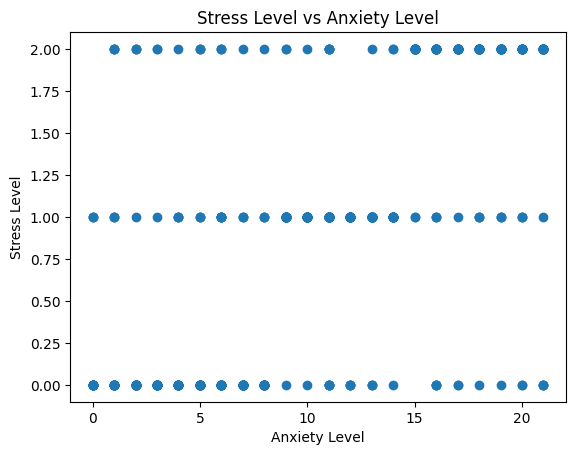

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(sl['anxiety_level'], sl['stress_level'])
plt.xlabel('Anxiety Level')
plt.ylabel('Stress Level')
plt.title('Stress Level vs Anxiety Level')
plt.show()

Normalize stress level column (scale values between 0 and 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Selecting numerical columns for scaling
numerical_columns = [
    'anxiety_level', 'SelfEsteem', 'mental_health_history', 'depression',
    'headache', 'blood_pressure', 'SleepQuality', 'breathing_problem',
    'noise_level', 'living_conditions', 'basic_needs',
    'academic_performance', 'study_load', 'teacher_student_relationship',
    'future_career_concerns', 'social_support', 'peer_pressure',
    'extracurricular_activities', 'bullying', 'stress_level']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Applying the scaler to the selected columns
sl[numerical_columns] = scaler.fit_transform(sl[numerical_columns])

# Displaying the scaled DataFrame
print(sl.head())

   anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0       0.666667    0.666667                    0.0    0.407407       0.4   
1       0.714286    0.266667                    1.0    0.555556       1.0   
2       0.571429    0.600000                    1.0    0.518519       0.4   
3       0.761905    0.400000                    1.0    0.555556       0.8   
4       0.761905    0.933333                    0.0    0.259259       0.4   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0             0.0           0.4                0.8          0.4   
1             1.0           0.2                0.8          0.6   
2             0.0           0.4                0.4          0.4   
3             1.0           0.2                0.6          0.8   
4             1.0           1.0                0.2          0.6   

   living_conditions  ...  academic_performance  study_load  \
0                0.6  ...                   0.6         0.4   
1       

Summarizing data (Descriptive Analysis)

In [ ]:
sl.idxmax()

,0
anxiety_level,19
SelfEsteem,41
mental_health_history,1
depression,9
headache,1
blood_pressure,1
SleepQuality,4
breathing_problem,7
noise_level,11
living_conditions,9


In [ ]:
sl.isin([3])

,anxiety_level,SelfEsteem,mental_health_history,depression,headache,blood_pressure,SleepQuality,breathing_problem,noise_level,living_conditions,...,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level,StressCategory
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Summary statistics for numeric columns
summary_stats = sl.describe()
print(summary_stats)

       anxiety_level  SelfEsteem  mental_health_history  depression  \
count     699.000000  699.000000             699.000000  699.000000   
mean        0.513386    0.602480               0.459227    0.453081   
std         0.283932    0.291927               0.498692    0.275107   
min         0.000000    0.000000               0.000000    0.000000   
25%         0.285714    0.366667               0.000000    0.259259   
50%         0.523810    0.633333               0.000000    0.444444   
75%         0.761905    0.866667               1.000000    0.666667   
max         1.000000    1.000000               1.000000    1.000000   

         headache  blood_pressure  SleepQuality  breathing_problem  \
count  699.000000      699.000000    699.000000         699.000000   
mean     0.486409        0.572961      0.550787           0.543062   
std      0.274778        0.411648      0.298005           0.272350   
min      0.000000        0.000000      0.000000           0.000000   
25%      0

In [ ]:
# Checking for missing values
missing_values = sl.isnull().sum()
print(missing_values)

anxiety_level                     0
SelfEsteem                        0
mental_health_history             0
depression                        0
headache                          0
blood_pressure                    0
SleepQuality                      0
breathing_problem                 0
noise_level                       0
living_conditions                 0
safety                            0
basic_needs                       0
academic_performance              0
study_load                        0
teacher_student_relationship      0
future_career_concerns            0
social_support                    0
peer_pressure                     0
extracurricular_activities        0
bullying                          0
stress_level                      0
StressCategory                  236
dtype: int64


In [ ]:
# Descriptive statistics for the 'stress_level' column
stress_level_stats = sl['stress_level'].describe()
print(stress_level_stats)

count    699.000000
mean       0.479971
std        0.398276
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: stress_level, dtype: float64


In [ ]:
# Calculating maximum values for each column
max_values = sl.max()
print("Maximum values:\n", max_values)


Maximum values:
 anxiety_level                   1.0
SelfEsteem                      1.0
mental_health_history           1.0
depression                      1.0
headache                        1.0
blood_pressure                  1.0
SleepQuality                    1.0
breathing_problem               1.0
noise_level                     1.0
living_conditions               1.0
safety                          5.0
basic_needs                     1.0
academic_performance            1.0
study_load                      1.0
teacher_student_relationship    1.0
future_career_concerns          1.0
social_support                  1.0
peer_pressure                   1.0
extracurricular_activities      1.0
bullying                        1.0
stress_level                    1.0
StressCategory                  Low
dtype: object


In [ ]:
# Calculating average (mean) values for numeric columns only
mean_values = sl.select_dtypes(include=['number']).mean()
print("\nMean (average) values:\n", mean_values)


Mean (average) values:
 anxiety_level                   0.513386
SelfEsteem                      0.602480
mental_health_history           0.459227
depression                      0.453081
headache                        0.486409
blood_pressure                  0.572961
SleepQuality                    0.550787
breathing_problem               0.543062
noise_level                     0.517024
living_conditions               0.509871
safety                          2.809728
basic_needs                     0.562804
academic_performance            0.559371
study_load                      0.512732
teacher_student_relationship    0.529328
future_career_concerns          0.519313
social_support                  0.640439
peer_pressure                   0.525322
extracurricular_activities      0.543062
bullying                        0.509585
stress_level                    0.479971
dtype: float64


In [ ]:
# Calculating median values for numeric columns only
median_values = sl.select_dtypes(include=['number']).median()
print("\nMedian values:\n", median_values)


Median values:
 anxiety_level                   0.523810
SelfEsteem                      0.633333
mental_health_history           0.000000
depression                      0.444444
headache                        0.400000
blood_pressure                  0.500000
SleepQuality                    0.600000
breathing_problem               0.400000
noise_level                     0.400000
living_conditions               0.600000
safety                          3.000000
basic_needs                     0.600000
academic_performance            0.400000
study_load                      0.400000
teacher_student_relationship    0.400000
future_career_concerns          0.400000
social_support                  0.666667
peer_pressure                   0.400000
extracurricular_activities      0.400000
bullying                        0.400000
stress_level                    0.500000
dtype: float64


In [ ]:
# Calculating mode values for numeric columns only
mode_values = sl.select_dtypes(include=['number']).mode()
print("\Mode values:\n", mode_values)

\Mode values:
    anxiety_level  SelfEsteem  mental_health_history  depression  headache  \
0        0.52381    0.833333                    0.0    0.444444       0.2   

   blood_pressure  SleepQuality  breathing_problem  noise_level  \
0             1.0           0.2                0.4          0.4   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                0.6  ...          0.4                   0.4         0.4   

   teacher_student_relationship  future_career_concerns  social_support  \
0                           0.4                     0.2             1.0   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0            0.4                         0.4       0.2           0.5  

[1 rows x 21 columns]


In [ ]:
# Group by 'self_esteem' and calculate the average 'stress_level'
grouped_stats = sl.groupby('SelfEsteem')['stress_level'].mean()
print(grouped_stats)

SelfEsteem
0.000000    0.785714
0.033333    0.900000
0.066667    0.730769
0.100000    0.807692
0.133333    0.923077
0.166667    0.944444
0.200000    0.911765
0.233333    0.785714
0.266667    0.911765
0.300000    0.968750
0.333333    0.857143
0.366667    0.833333
0.400000    1.000000
0.433333    0.888889
0.466667    0.884615
0.500000    0.666667
0.533333    0.476190
0.566667    0.500000
0.600000    0.450000
0.633333    0.400000
0.666667    0.452381
0.700000    0.478261
0.733333    0.500000
0.766667    0.568966
0.800000    0.444444
0.833333    0.159091
0.866667    0.036585
0.900000    0.085714
0.933333    0.090909
0.966667    0.052632
1.000000    0.025641
Name: stress_level, dtype: float64


In [ ]:
# Performing a t-test to compare high and low self-esteem groups
from scipy.stats import ttest_ind
high_self_esteem = sl[sl['SelfEsteem'] > 15]['stress_level']
low_self_esteem = sl[sl['SelfEsteem'] <= 15]['stress_level']
t_stat, p_val = ttest_ind(high_self_esteem, low_self_esteem)
print(f'T-test statistic: {t_stat}, p-value: {p_val}')

T-test statistic: nan, p-value: nan


Data Aggregation

In [ ]:
# Grouping data by 'SelfEsteem' and calculating mean stress level
grouped_data = sl.groupby('SelfEsteem')['stress_level'].mean().reset_index()

In [ ]:
# Aggregating data with multiple functions (mean, min, max) for 'stress_level' by 'anxiety_level'
aggregated_data = sl.groupby('anxiety_level').agg({'stress_level': ['mean', 'min', 'max'],'SelfEsteem': 'mean'}).reset_index()

In [ ]:
# Displaying aggregated results
print(grouped_data.head())
print(aggregated_data.head())

   SelfEsteem  stress_level
0    0.000000      0.785714
1    0.033333      0.900000
2    0.066667      0.730769
3    0.100000      0.807692
4    0.133333      0.923077
  anxiety_level stress_level           SelfEsteem
                        mean  min  max       mean
0      0.000000     0.078947  0.0  0.5   0.877193
1      0.047619     0.196429  0.0  1.0   0.829762
2      0.095238     0.112903  0.0  1.0   0.800000
3      0.142857     0.092593  0.0  1.0   0.793827
4      0.190476     0.130435  0.0  1.0   0.795652


# Data Visualization using Pandas





anxiety_level                    float64
SelfEsteem                         int64
mental_health_history            float64
depression                       float64
headache                         float64
blood_pressure                   float64
SleepQuality                     float64
breathing_problem                float64
noise_level                      float64
living_conditions                float64
safety                           float64
basic_needs                      float64
academic_performance             float64
study_load                       float64
teacher_student_relationship     float64
future_career_concerns           float64
social_support                     int64
peer_pressure                    float64
extracurricular_activities       float64
bullying                         float64
stress_level                     float64
StressCategory                  category
dtype: object
[2 1 3 0]
[20  8 18 12 28 13  3 22 15 23 21  1  5  6  9  4 19 16  2 29 14 26  7 17
 

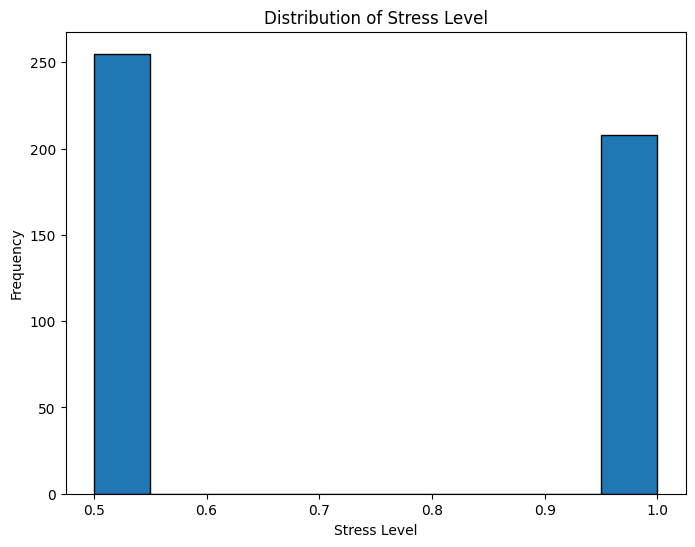

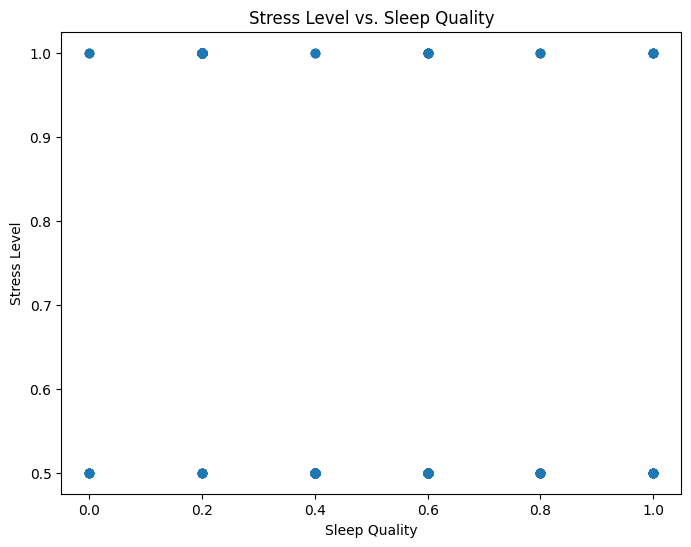

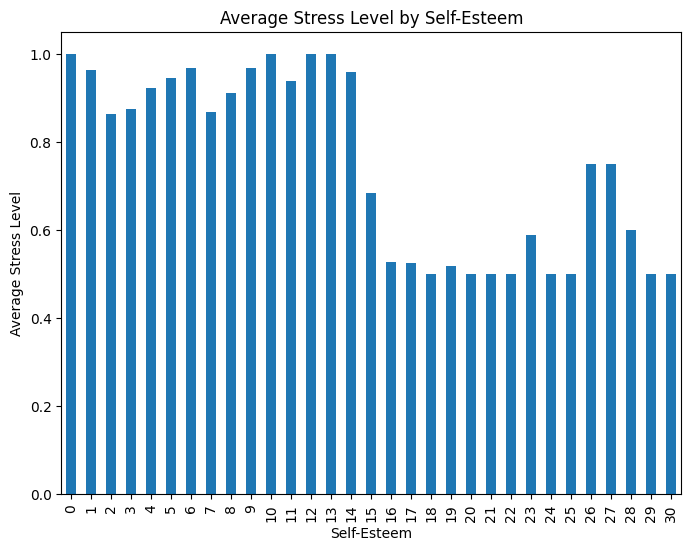

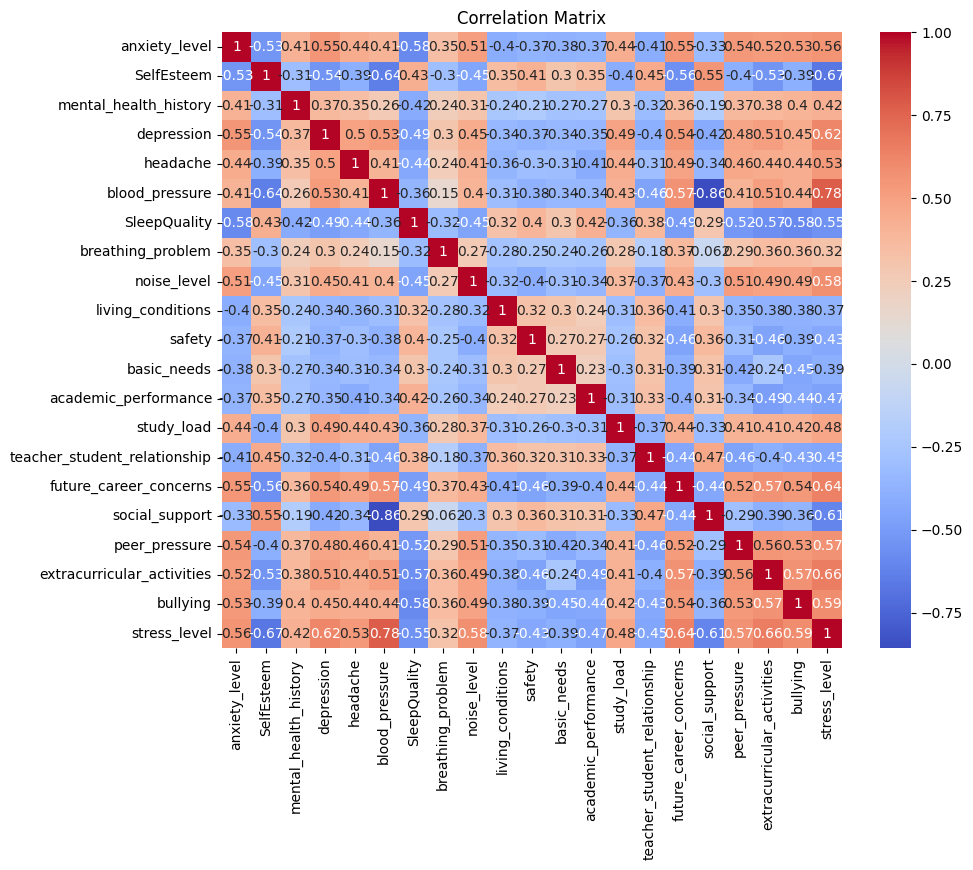

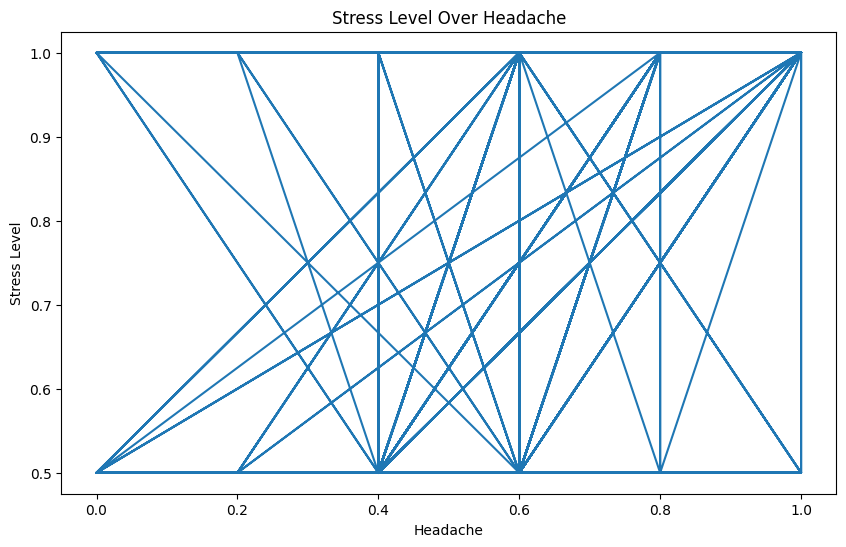

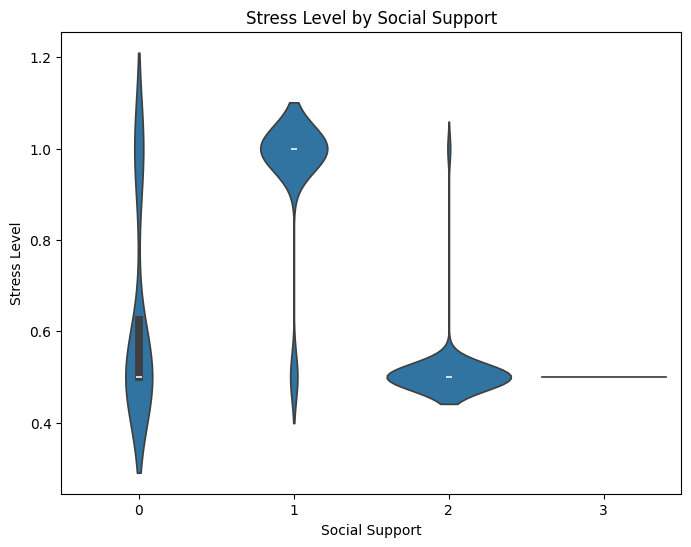

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Check data types before conversion
print(sl.dtypes)

# Inspect unique values in categorical columns
print(sl['social_support'].unique())
print(sl['SelfEsteem'].unique())

# Convert categorical columns to numeric
le_social = LabelEncoder()
le_self_esteem = LabelEncoder()

sl['social_support'] = le_social.fit_transform(sl['social_support'])
sl['SelfEsteem'] = le_self_esteem.fit_transform(sl['SelfEsteem'])

# Ensure stress_level is numeric
sl['stress_level'] = pd.to_numeric(sl['stress_level'], errors='coerce')

# Drop any rows with NaN values
sl = sl.dropna()

# Recheck data types after conversion
print(sl.dtypes)

# 1. Histogram of Stress Level
plt.figure(figsize=(8, 6))
plt.hist(sl['stress_level'], bins=10, edgecolor='black')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

# 2. Scatter plot of Stress Level vs. Sleep Quality
plt.figure(figsize=(8, 6))
plt.scatter(sl['SleepQuality'], sl['stress_level'])
plt.title('Stress Level vs. Sleep Quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Stress Level')
plt.show()

# 4. Bar chart of Average Stress Level by Self-Esteem
plt.figure(figsize=(8, 6))
sl.groupby('SelfEsteem')['stress_level'].mean().plot(kind='bar')
plt.title('Average Stress Level by Self-Esteem')
plt.xlabel('Self-Esteem')
plt.ylabel('Average Stress Level')
plt.show()

# 5. Correlation Heatmap
plt.figure(figsize=(10, 8))
# Select only numerical features for correlation calculation
numerical_sl = sl.select_dtypes(include=['number'])  # Filter for numeric columns
sns.heatmap(numerical_sl.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6. Line plot of Stress Level over Headache (adjust accordingly)
plt.figure(figsize=(10, 6))
plt.plot(sl['headache'], sl['stress_level'])
plt.title('Stress Level Over Headache')
plt.xlabel('Headache')
plt.ylabel('Stress Level')
plt.show()

# 8. Violin plot of Stress Level by Social Support
plt.figure(figsize=(8, 6))
sns.violinplot(x='social_support', y='stress_level', data=sl)
plt.title('Stress Level by Social Support')
plt.xlabel('Social Support')
plt.ylabel('Stress Level')
plt.show()

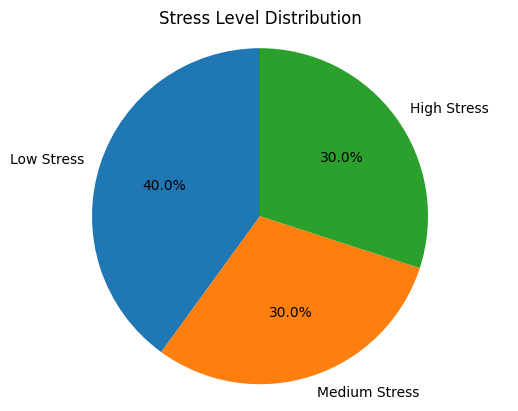

In [ ]:
import matplotlib.pyplot as plt

# Sample data for the pie chart
labels = ['Low Stress', 'Medium Stress', 'High Stress']
sizes = [40, 30, 30]  # Percentage or values for each category

# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Stress Level Distribution')

# Ensure the circle is a proper circle
plt.axis('equal')

# Show the chart
plt.show()


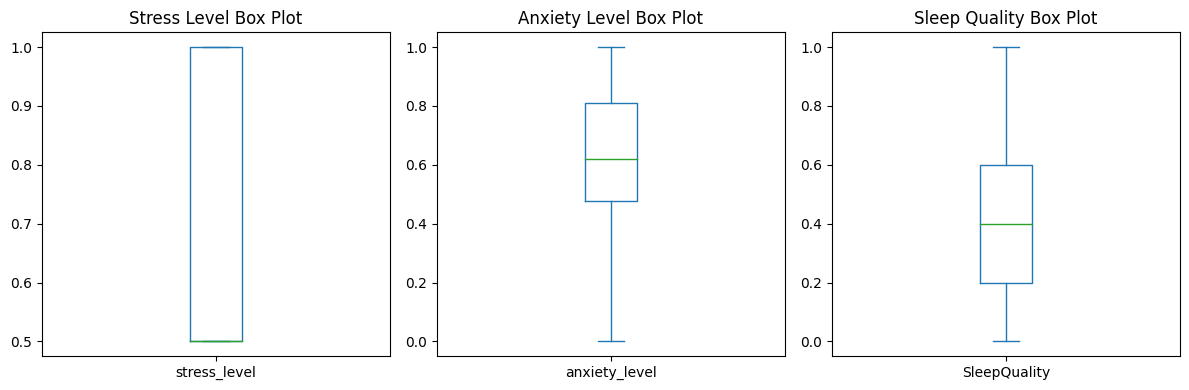

In [ ]:
# Import the necessary library (if not already imported)
import matplotlib.pyplot as plt

# Create the first box plot for 'stress_level'
plt.figure(figsize=(12, 4))  # Adjust figure size as needed

plt.subplot(1, 3, 1)  # Create the first subplot (1 row, 3 columns, 1st plot)
sl['stress_level'].plot(kind='box')  # Create a box plot of 'stress_level'
plt.title('Stress Level Box Plot')

# Create the second box plot for 'anxiety_level'
plt.subplot(1, 3, 2)  # Create the second subplot
sl['anxiety_level'].plot(kind='box')
plt.title('Anxiety Level Box Plot')

# Create the third box plot for 'sleep_quality'
plt.subplot(1, 3, 3)  # Create the third subplot
sl['SleepQuality'].plot(kind='box')
plt.title('Sleep Quality Box Plot')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



# Classification Algorithms

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # Import numpy for binning

# ... (your existing code for data loading and preprocessing) ...

# 2. Define Features (X) and Target (y)
X = sl[['anxiety_level', 'SleepQuality', 'SelfEsteem', 'social_support', 'headache']]
y = sl['stress_level']

# Convert 'stress_level' to discrete categories if necessary
# Example using numpy.digitize to create 3 categories:
bins = np.array([0, 0.33, 0.66, 1])  # Define your stress level category boundaries
y = np.digitize(y, bins) - 1  # Assign labels to categories

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# a. Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
logreg_predictions = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# ... (rest of your code for other models and evaluation) ...

print(f"Logistic Regression Accuracy: {logreg_accuracy}")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.9354838709677419
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        48
           3       0.93      0.93      0.93        45

    accuracy                           0.94        93
   macro avg       0.94      0.94      0.94        93
weighted avg       0.94      0.94      0.94        93



# Linear Algebra
To study Scipy Library functions for linear algebra solve following examples-

1)Find inverse of Matrix- [1 2 3, 0 1 4, 5 6 0]

2)Solve the Linear equation
x + 2y + 3z = 14,
2x - y + z = 7,
3x + y - z = 4

3)Find determinant of matrix in [133,702,896]

4)Calculate kronecker product of matrix in  [1 2 3, 0 1 4, 5 6 0]
 with [7 9 1, 6 7 2 ,1 5 4]

In [ ]:
import numpy as np

# Example 3x3 matrix
matrix = np.array([[1, 2, 3],
                  [0, 1, 4],
                  [5, 6, 0]])

# Calculate the inverse of the matrix
try:
  inverse_matrix = np.linalg.inv(matrix)
  print("Inverse of the matrix:\n", inverse_matrix)

except np.linalg.LinAlgError:
  print("The matrix is singular and does not have an inverse.")


# Explanation:
# 1. We import the NumPy library for numerical operations, including linear algebra.
# 2. We define a 3x3 matrix using a NumPy array.
# 3. We use the np.linalg.inv() function to calculate the inverse of the matrix.
# 4. We handle the case where the matrix is singular (cannot be inverted) using a try-except block.
# 5. If the inverse exists, we print it. Otherwise, we print a message indicating the matrix is singular.


Inverse of the matrix:
 [[-24.  18.   5.]
 [ 20. -15.  -4.]
 [ -5.   4.   1.]]


In [ ]:
# Import NumPy for linear algebra operations
import numpy as np

# Define the coefficients of the linear equations
# Let's solve the following system:
# x + 2y + 3z = 14
# 2x - y + z = 7
# 3x + y - z = 4

A = np.array([[1, 2, 3],
              [2, -1, 1],
              [3, 1, -1]])  # Coefficients of x, y, z

b = np.array([14, 7, 4])  # Constants on the right side of the equations

# Solve the linear equations using NumPy's linear algebra solver
solution = np.linalg.solve(A, b)

# Print the solution (values of x, y, and z)
print("Solution (x, y, z):", solution)

# Explanation:
# 1. We define the coefficient matrix 'A' and the constant vector 'b' for the system of linear equations.
# 2. We use np.linalg.solve(A, b) to solve for the variables x, y, z.
# 3. The result 'solution' is a NumPy array containing the values of x, y, z that satisfy the equations.
# 4. We print the solution to show the values of x, y, z that satisfy the system.


Solution (x, y, z): [2.2 0.8 3.4]


In [ ]:
import numpy as np

matrix = np.array([[1, 3, 3],
                  [7, 0, 2],
                  [8, 9, 6]])

determinant = np.linalg.det(matrix)
print("Determinant of the matrix:", determinant)


Determinant of the matrix: 93.00000000000003


In [ ]:
import numpy as np
# Import NumPy for linear algebra operations

# Define the two matrices
matrix1 = np.array([[1, 2, 3],
                   [0, 1, 4],
                   [5, 6, 0]])

matrix2 = np.array([[7, 9, 1],
                   [6, 7, 2],
                   [1, 5, 4]])

# Calculate the Kronecker product
kronecker_product = np.kron(matrix1, matrix2)

# Print the result
print("Kronecker product of the matrices:\n", kronecker_product)


# Statistical analysis using Anova in Python

In [ ]:
import statsmodels.formula.api as sm

# Specify the model formula (stress_level as dependent variable, self_esteem as independent variable)
model = sm.ols('stress_level ~ SelfEsteem', data=sl)

# Fit the model to the data
results = model.fit()

# Print the ANOVA table
print(results.summary())


# In this example, the ANOVA table will provide information like:
#  - Degrees of freedom
#  - Sum of squares
#  - Mean squares
#  - F-statistic
#  - P-value

# These values will help you determine if there's a statistically significant difference in stress levels between different self-esteem groups.


                            OLS Regression Results                            
Dep. Variable:           stress_level   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     378.8
Date:                Fri, 18 Oct 2024   Prob (F-statistic):           4.99e-62
Time:                        19:48:19   Log-Likelihood:                 126.14
No. Observations:                 463   AIC:                            -248.3
Df Residuals:                     461   BIC:                            -240.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0455      0.019     56.256      0.0